In [2]:
EXPERIMENT_FOLDER_PATH = "../reports/experiments/2019-1-27_10-42/" 

In [78]:
import pandas as pd
import os
import seaborn as sns
import statsmodels.formula.api as sm
from scipy.stats import pearsonr
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
rowList = []
for f in os.listdir(EXPERIMENT_FOLDER_PATH):
    if "best_policies" in f:
        epoch = int(f.split(".")[0].replace("epoch",""))
        max_val_acc_str = f.split(".")[1].split("_")[-1]
        max_val_acc = float("0." + max_val_acc_str)
        df = pd.read_csv(EXPERIMENT_FOLDER_PATH + f)
        rowList.append([epoch, max_val_acc, df["0"].values])
        
max_val_acc_df = pd.DataFrame(rowList, columns=["epoch","max_val_acc","best_policy"])
max_val_acc_df.sort_values("epoch", inplace=True)
max_val_acc_df.head()

,epoch,max_val_acc,best_policy
214,0,0.277,"[Operation 0 (P=0.100, M=0.033)\nOperation 10..."
343,1,0.240,"[Operation 5 (P=0.000, M=0.222)\nOperation 3..."
537,2,0.265,"[Operation 12 (P=0.400, M=1.900)\nOperation 4..."
116,3,0.260,"[Operation 3 (P=0.900, M=0.050)\nOperation 3..."
306,4,0.221,"[Operation 10 (P=0.000, M=1.900)\nOperation 3..."


Text(0, 0.5, 'maximum validation accuracy of child model')

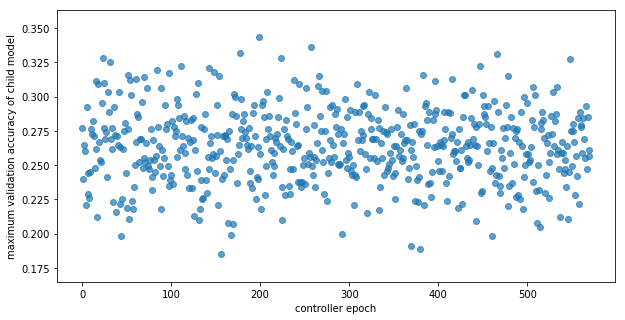

In [46]:
plt.figure(figsize=(10,5))
plt.scatter(max_val_acc_df["epoch"].values, max_val_acc_df["max_val_acc"].values, alpha=0.7)
plt.xlabel("controller epoch")
plt.ylabel("maximum validation accuracy of child model")

Text(0.5, 1.0, 'Distribution of maximum validation accuracies from child model')

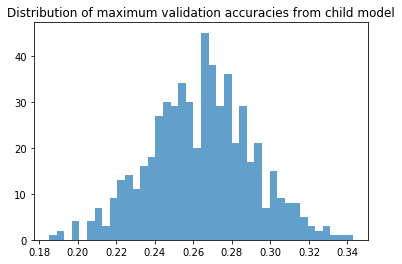

In [47]:
_ = plt.hist(max_val_acc_df["max_val_acc"].values, bins=40, alpha=0.7)
plt.title("Distribution of maximum validation accuracies from child model")

## Can two sample have same policy?

In [37]:
max_val_acc_df["best_policy"].astype(str).values.__len__() == \
max_val_acc_df["best_policy"].astype(str).unique().__len__()

True

## Analysis for validation loss

In [19]:
rowList = []
for f in os.listdir(EXPERIMENT_FOLDER_PATH):
    if "child_history" in f:
        hist_df = pd.read_csv(EXPERIMENT_FOLDER_PATH + f)
        epoch = f.split(".")[0].replace("epoch","")
        rowList.append([int(epoch), hist_df["val_loss"].min(), hist_df["loss"].min()])


In [21]:
loss_df = pd.DataFrame(rowList, columns=["epoch","val_loss","loss"])
loss_df.sort_values("epoch", inplace=True)
loss_df.head()

,epoch,val_loss,loss
336,0,9.729,1.992
411,1,11.471,1.793
486,2,11.408,1.996
558,3,11.175,1.939
378,4,10.787,2.145


## Iteration vs validation loss

Text(-18.685403225806468, 8.384934914637965, 'Pearson r=-0.05,  p=0.23')

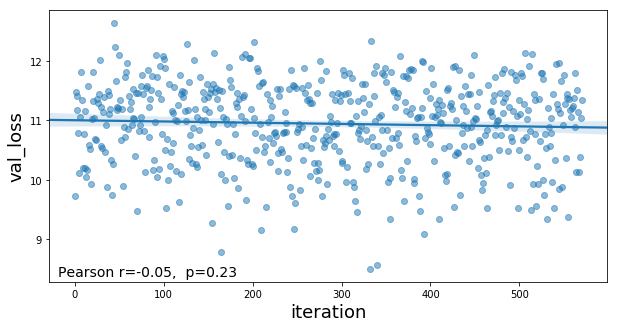

In [85]:
r,p = pearsonr(loss_df["epoch"], loss_df["val_loss"])
r=np.round(r,2)
p=np.round(p,2)

plt.figure(figsize=(10,5))
sns.regplot(x="epoch", y="val_loss", data=loss_df, scatter_kws={"alpha":0.5})
plt.xlabel("iteration", fontsize=18)
plt.ylabel("val_loss", fontsize=18)
plt.text(plt.xlim()[0]+10, plt.ylim()[0]+0.1, f"Pearson r={r},  p={p}", fontsize=14)

In [62]:
result = sm.ols(formula="val_loss ~ epoch", data=loss_df).fit()
print (result.params)
result.summary()

Intercept    11.002165
epoch        -0.000207
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               val_loss   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.417
Date:                Mon, 28 Jan 2019   Prob (F-statistic):              0.234
Time:                        21:14:45   Log-Likelihood:                -592.96
No. Observations:                 571   AIC:                             1190.
Df Residuals:                     569   BIC:                             1199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0022      0.057    192.226      0.000      10.890      11.115
epoch         -0.0002      0.000     -1.190      0.234      -0.001       0.000
==============================================================================
Omnibus:                       22.755   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.752
Skew:                          -0.510   Prob(JB):                     4.22e-06
Kurtosis:                       3.004   Cond. No.                         658.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Iteration vs training loss

Text(-18.685403225806468, 1.6149393682513538, 'Pearson r=0.06,  p=0.13')

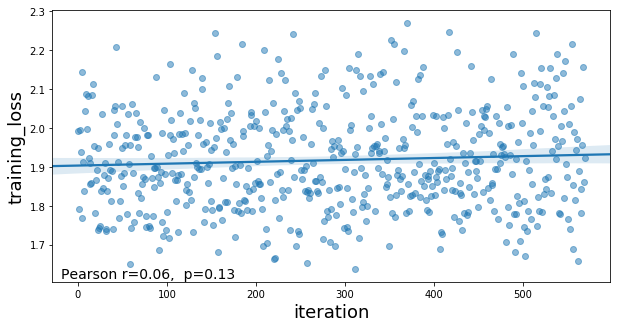

In [84]:
r,p = pearsonr(loss_df["epoch"], loss_df["loss"])
r=np.round(r,2)
p=np.round(p,2)

plt.figure(figsize=(10,5))
sns.regplot(x="epoch", y="loss", data=loss_df, scatter_kws={"alpha":0.5})
plt.xlabel("iteration", fontsize=18)
plt.ylabel("training_loss", fontsize=18)
plt.text(plt.xlim()[0]+10, plt.ylim()[0]+0.01, f"Pearson r={r},  p={p}", fontsize=14)

In [65]:
pearsonr(loss_df["epoch"], loss_df["loss"])

(0.06271353237139991, 0.13445374762466025)

In [61]:
result = sm.ols(formula="loss ~ epoch", data=loss_df).fit()
print (result.params)
result.summary()

Intercept    1.903490
epoch        0.000048
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.247
Date:                Mon, 28 Jan 2019   Prob (F-statistic):              0.134
Time:                        21:14:38   Log-Likelihood:                 367.62
No. Observations:                 571   AIC:                            -731.2
Df Residuals:                     569   BIC:                            -722.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9035      0.011    178.850      0.000       1.883       1.924
epoch       4.845e-05   3.23e-05      1.499      0.134    -1.5e-05       0.000
==============================================================================
Omnibus:                       16.082   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.410
Skew:                           0.329   Prob(JB):                     0.000743
Kurtosis:                       2.584   Cond. No.                         658.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""